In [1]:
import networkx as nx
import pandas as pd

In [2]:
# for visualization
import numpy as np
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5, scores=True):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores=scores, edge_width=edge_width)
    
    return SVG(image)

In [3]:
scale = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [4]:
G = nx.complete_graph(scale)

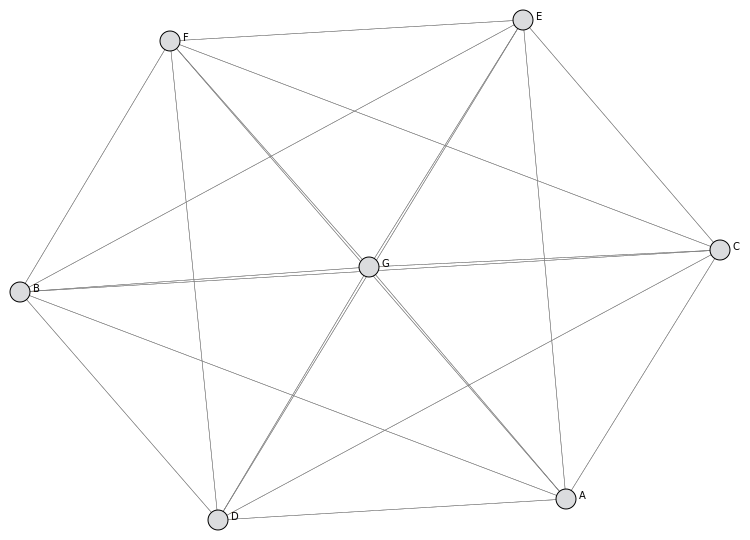

In [5]:
draw_graph(G, node_size=10, show_names=True)

In [6]:
#nx.shortest_path(G)
note_paths = []

origin_note = scale[0]

for note in scale[1:]:

    path = list(nx.all_simple_paths(G, origin_note, note))
    note_paths.extend(path)
    
for path in note_paths: # turn stream into cycle
    
    path.append(origin_note)
    
note_paths

[['A', 'B', 'A'],
 ['A', 'C', 'B', 'A'],
 ['A', 'C', 'D', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'F', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'G', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'E', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'E', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'G', 'E', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'E', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'E', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'F', 'E', 'B', 'A'],
 ['A', 'C', 'E', 'B', 'A'],
 ['A', 'C', 'E', 'D', 'B', 'A'],
 ['A', 'C', 'E', 'D', 'F', 'B', 'A'],
 ['A', 'C', 'E', 'D', 'F', 'G', 'B', 'A'],
 ['A', 'C', 'E', 'D', 'G', 'B', 'A'],
 ['A', 'C', 'E', 'D', 'G', 'F', 'B', 'A'],
 ['A', 'C', 'E', 'F', 'B', 'A'],
 ['A', 'C', 'E', 'F', 'D', 'B', 'A'],
 ['A', 'C', 'E', 'F', 'D', 'G', 'B', 'A'],
 ['A', 'C

In [7]:
len(scale)

7

In [8]:
len(note_paths)

1956

In [9]:
note_paths[0:6] # all paths including short paths; options of different lengths for creativity

[['A', 'B', 'A'],
 ['A', 'C', 'B', 'A'],
 ['A', 'C', 'D', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'F', 'G', 'B', 'A']]

In [10]:
note_paths = [p for p in note_paths if len(p)==8] # full path hitting every note on the way

In [11]:
note_paths[0:6]

[['A', 'C', 'D', 'E', 'F', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'E', 'G', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'E', 'G', 'B', 'A'],
 ['A', 'C', 'D', 'F', 'G', 'E', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'E', 'F', 'B', 'A'],
 ['A', 'C', 'D', 'G', 'F', 'E', 'B', 'A']]

In [12]:
G = nx.path_graph(scale, create_using=nx.DiGraph)

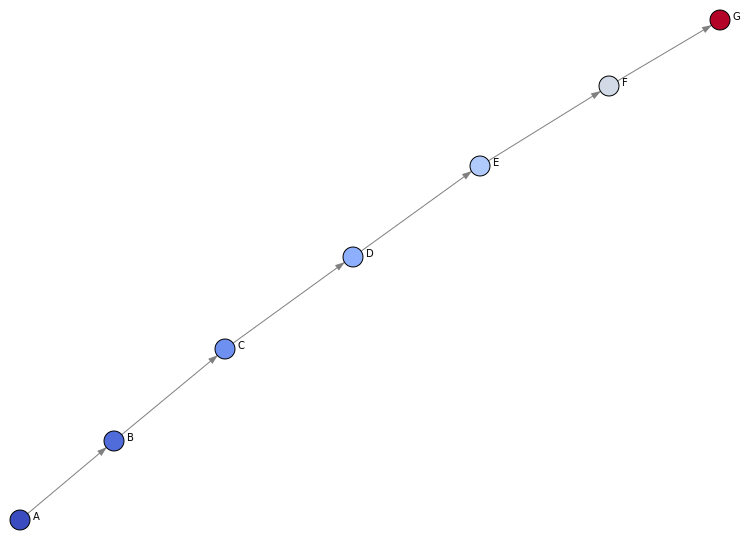

In [13]:
draw_graph(G, node_size=10, show_names=True, edge_width=1)

Path: ['A', 'C', 'D', 'F', 'G', 'E', 'B', 'A']


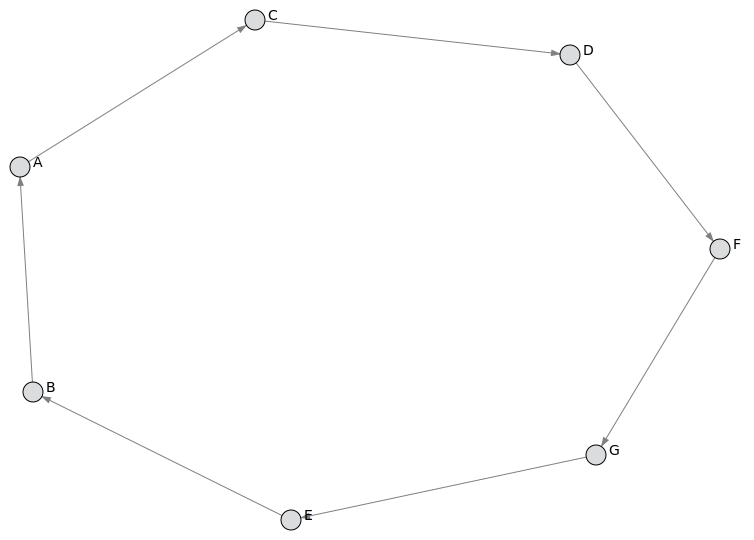

In [14]:
path = note_paths[3]

G = nx.path_graph(path, create_using=nx.DiGraph)
print('Path: {}'.format(path))
draw_graph(G, node_size=10, show_names=True, edge_width=1, font_size=14)

Path: ['A', 'E', 'G', 'C', 'F', 'D', 'B', 'A']


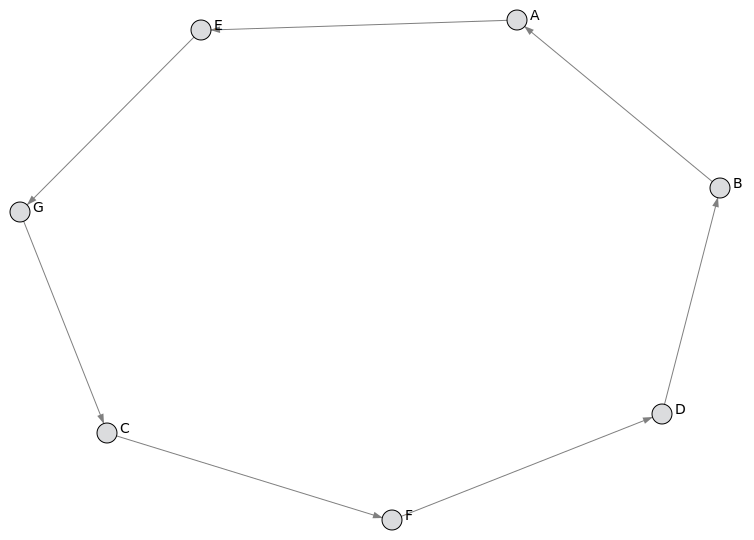

In [16]:
from random import choice

path = choice(note_paths)

G = nx.path_graph(path, create_using=nx.DiGraph)
print('Path: {}'.format(path))
draw_graph(G, node_size=10, show_names=True, edge_width=1, font_size=14)

# Sequence Play

From here, we have a list of sequences that we can choose random sequences from. I would like to programmatically flip through them to listen for inspiration.

Playing three or four in a sequence can give an interesting progression.
Jumping to the the other side of a graph can help in creating a separate progression.
You don't have to play in order. Music and writing use burstiness for effect. 

In [17]:
#!pip install sounddevice

In [18]:
import numpy as np
import sounddevice as sd

def play_note(note, duration=1.0, repeat_times=1):
    
    notes = {}

    notes['A'] = 440
    notes['B'] = 493.88
    notes['C'] = 261.63
    notes['D'] = 293.66
    notes['E'] = 329.63
    notes['F'] = 349.23
    notes['G'] = 392.00

    # define parameters for note
    frequency = notes[note]  # Frequency of the note in Hz (A4)
    sample_rate = 44100  # Samples per second

    # generate the note
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    
    # allow repeats to make more songlike for catching inspiration
    for i in range(repeat_times):

        # Play the note
        sd.play(wave, samplerate=sample_rate)
        sd.wait()  # Wait until the note is done playing

In [19]:
path

['A', 'E', 'G', 'C', 'F', 'D', 'B', 'A']

In [20]:
[play_note(note, 0.3, repeat_times=2) for note in path]

[None, None, None, None, None, None, None, None]

# Randomize the Play

Path: ['A', 'F', 'C', 'B', 'D', 'E', 'G', 'A']


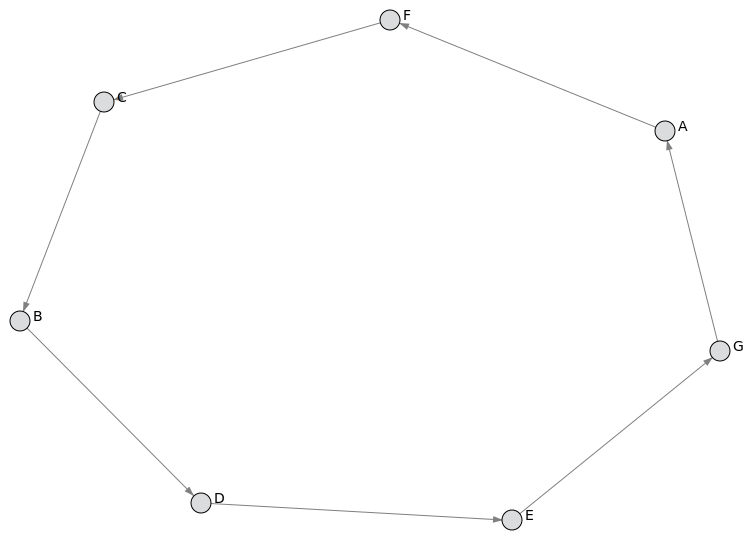

In [24]:
path = choice(note_paths)

G = nx.path_graph(path, create_using=nx.DiGraph)
print('Path: {}'.format(path))
draw_graph(G, node_size=10, show_names=True, edge_width=1, font_size=14)

In [25]:
[play_note(note, 0.3, repeat_times=2) for note in path]

[None, None, None, None, None, None, None, None]

# Longer Sequences

Let's make a longer sequence and play it, choosing randomly from the graph. We can use simple addition to stich a song together.

In [24]:
s1 = choice(note_paths)
s2 = choice(note_paths)

song = s1 + s1 + s2 + s1 + s1 + s2 + s1

song

['A',
 'G',
 'C',
 'E',
 'B',
 'D',
 'F',
 'A',
 'A',
 'G',
 'C',
 'E',
 'B',
 'D',
 'F',
 'A',
 'A',
 'F',
 'E',
 'C',
 'G',
 'D',
 'B',
 'A',
 'A',
 'G',
 'C',
 'E',
 'B',
 'D',
 'F',
 'A',
 'A',
 'G',
 'C',
 'E',
 'B',
 'D',
 'F',
 'A',
 'A',
 'F',
 'E',
 'C',
 'G',
 'D',
 'B',
 'A',
 'A',
 'G',
 'C',
 'E',
 'B',
 'D',
 'F',
 'A']

In [245]:
[play_note(note, 0.6, repeat_times=2) for note in song]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [246]:
s1 = choice(note_paths)
s2 = choice(note_paths)
s3 = choice(note_paths)

song = s1 + s1 + s2 + s1 + s2 + s2 + s3

song

['A',
 'C',
 'D',
 'G',
 'F',
 'B',
 'E',
 'A',
 'A',
 'C',
 'D',
 'G',
 'F',
 'B',
 'E',
 'A',
 'A',
 'E',
 'G',
 'D',
 'F',
 'B',
 'C',
 'A',
 'A',
 'C',
 'D',
 'G',
 'F',
 'B',
 'E',
 'A',
 'A',
 'E',
 'G',
 'D',
 'F',
 'B',
 'C',
 'A',
 'A',
 'E',
 'G',
 'D',
 'F',
 'B',
 'C',
 'A',
 'A',
 'G',
 'B',
 'C',
 'E',
 'D',
 'F',
 'A']

In [247]:
[play_note(note, 0.6, repeat_times=2) for note in song]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Next Up

Next, I will incorporate actual scales. I used ABCDEFG to have a simple start. We need flats and sharps, and the note player needs expanded. I would also like to smooth out the sound to avoid the sharp clicks.

This is a fun thing that a musician can play along with, already. Good enough for a first attempt.

We have made a graph approach for creating music and exploring sound.